<a href="https://colab.research.google.com/github/byrocuy/REA_AI_Bootcamp/blob/main/week-4/session-3/00_models_REA3X33Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Webinar 11 Model Hub + Gradio
- Introduction = 19.00-19.05
- Mulai Materi 1 (Model Hub) = 19.05-19.35
- Mengerjakan Tugas 1 (Model Hub) = 19.35-19.55
- Istirahat = 19.55-20.05
- Mulai Materi 2 (Gradio) = 20.05-20.35
- Mengerjakan Tugas = 20.35 - 20.55
- Closing = 20.55-21.00

# Model Hub 🗃️

Have you ever wished for a one-stop-shop where you could access and share many pre-trained models, especially when knee-deep in NLP research? Hmm, Sounds familiar? 🤔

Well, good news! **Model Hub** is the knight in shining armour we've all been waiting for. In essence, Model Hub is like a bustling marketplace teeming with community-shared, pre-trained models or, as we call them, 'model checkpoints'.

## Relation to the Pipeline API

The benefit of using the Model Hub over the Pipeline API is that you can use the Model Hub to find models that are not available in the Pipeline API. Moreover in the Model Hub, we can fine-tune the model to our liking. We will learn about fine-tuning in the next section.

## Meet Hugging Face Model Hub

One such treasure trove is the [**Hugging Face Model Hub**](https://huggingface.co/models). Picture this: over 10,000 pre-trained models speaking more than 100 different 'languages', including crowd-favourites such as BERT, GPT-2, and RoBERTa. Yes, you read it right!

Long story short, these models are ready to use and are fine-tunable to your requirements via **PyTorch**. For instance, see how we summon a BERT model:

In [1]:
!pip install rggrader transformers sentencepiece -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.5 MB/s eta 0:00:00


In [ ]:
#versi ke 2 cara pemanggilan suatu model di model hub
from transformers import AutoModel
model = AutoModel.from_pretrained('bert-base-uncased')
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

`AutoModel` is a generic class that will be instantiated as one of the model classes. By using `AutoModel` we don't need to specify the model class. The `from_pretrained` method downloads the model from the Hugging Face Model Hub.

The code above is similar to :

In [ ]:
#cara panggil versi 1 / jadul menurut saya

from transformers import BertModel, BertTokenizer
model = BertModel.from_pretrained('bert-base-uncased')
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

## Important 'Tech-Talk' Corner 🗣️

Don't worry! We will only let you delve into the Model Hub world if you are armed. So here's a quick 'tech-talk' session to equip you with some crucial jargon:

- **Tokenizer**: Think of it as a 'word-whittler'. It chops a sentence into individual 'tokens' or words because, let's face it, our machine-learning models are different from raw text data. Peek into the life of a tokenizer here: [openai-tokenizer](https://platform.openai.com/tokenizer)

  ![tokenizer](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/openai-tokenizer.png)

kalimat = "saya sedang belajar"

- token = "saya", "sedang", "bealajar" --> vector 0 , 1, 2
- tokenizer =

- vector = mengubah token menjadi suatu angka
- vectorizer = bag of words / n gram / tf idf / embeddings

## Decoding the Mind of Models 🧠

Have you ever felt like interpreting these cognitive machine-learning models is like cracking a secret code? You're not alone! Understanding how these models work under the hood and how we can manipulate them to solve various NLP tasks can seem daunting. But don't worry, we've got you covered!

### The Hugging Face Model Playbook 📒

To make our lives easier, the Hugging Face Model Hub categorizes models into different classes, each with its own 'superpower':

- **Autoregressive models** (think GPT) are like fortune-tellers. They predict the next token in a sequence based solely on the tokens they've seen before.
- **Autoencoding models** (say hello to BERT) are the masters of reconstruction. You give them a broken sentence (with parts masked), ask them to fix it, and voila! They restore it beautifully.
- **Sequence-to-sequence models** are the transformers of the lot. They take one sequence and mould it into a different one.
- **Multimodal models** are the all-rounders. They can juggle multiple inputs, like text and images, simultaneously.

And there you have it! A quick primer on the various classes of models you'll encounter on the Hub.

In [ ]:
saya lagi belajar python
saya lagi belajar [MASK]

### Autoregressive Models: The Wordsmiths 🖋️

Let's zoom in on autoregressive models, such as GPT-2, typically employed for text-generation tasks. These models are like seasoned writers, leveraging their language syntax and semantics understanding to craft coherent and contextually relevant sentences.

Let's play a little 'Complete the Sentence' game with our GPT-2 model. We're going to feed it with a sentence fragment, "Hello, I'm a language model," and let's see how it completes it in five different ways:

In [3]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Setting up model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Setting seed for reproducibility
torch.manual_seed(42)

# Input text
input_text = "Hello, I'm a language model,"
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Let's generate text
output = model.generate(input_ids, max_length=30, num_return_sequences=5, do_sample=True)

# Now, it's time to decode the generated text
for i in range(5):
    print("==========================================\n")
    sequence = tokenizer.decode(output[i], skip_special_tokens=True)
    print(f"{i+1}. {sequence}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



1. Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are

2. Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.


3. Hello, I'm a language model, and I'll do it in no time!

One of the things we learned from talking to my friend

4. Hello, I'm a language model, not a command line tool.

If my code is simple enough:

if (use (string

5. Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example.


In [4]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
text = generator("Hello, I'm a language model,", max_length=30, num_return_sequences=1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [5]:
text[0]['generated_text']

"Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"

And there you have your five unique continuations! Isn't it fascinating how one model can offer a variety of completions, each making sense in its way? Trust me, it's just the beginning!

### Autoencoding Models: The Text Restorers 🧩

Let's switch gears and delve into the world of autoencoding models, such as BERT. Have you ever wished you could fill in the gaps or missing parts in a text? Well, these models are designed to do just that!

Consider the 'Fill in the Blanks' game we all used to play as kids. Similarly, we can use BERT to fill in a '[MASK]' token in a sentence. Let's give it a try:

In [ ]:
from transformers import BertTokenizer, BertForMaskedLM
import torch

# Setting up model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

# Input text with a masked token
input_text = "Hello, I'm a [MASK] model."
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Let's predict the masked token
output = model(input_ids).logits

# Let's get the predicted token
predicted_index = torch.argmax(output[0, input_ids[0].tolist().index(103)]).item()
predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]

print("==========================================")
print(f"The masked token is: {predicted_token}")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The masked token is: role


Now, you might wonder what's happening in the last two lines of code. Here's a quick rundown:

- `torch.argmax`: Since the model returns a probability distribution for each possible token, we use `argmax` to choose the token with the highest probability.
- `tokenizer.convert_ids_to_tokens`: The model's output is the predicted token's ID. To make sense of it, we need to convert this ID back to a token (word), and that's exactly what this function does.

And there you have it! BERT magically filled in the blank for us! These models have come a long way from the 'Hangman' games we used to play, right?

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10731087625026703,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.08774476498365402,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.053383879363536835,
  'token': 2047,
  'token_str': 'new',
  'sequence': "hello i'm a new model."},
 {'score': 0.04667221009731293,
  'token': 3565,
  'token_str': 'super',
  'sequence': "hello i'm a super model."},
 {'score': 0.027095887809991837,
  'token': 2986,
  'token_str': 'fine',
  'sequence': "hello i'm a fine model."}]

### Sequence-to-Sequence Models: The Language Translators 🌐

Have you ever marvelled at effortlessly converting one sequence into another, such as translating English text to French? Sequence-to-Sequence models, also known as Seq2Seq models, are your magic wands for this task. Our star of the show today is FSMT (Fairseq Sequence-to-Sequence), chosen for its prowess in language translation.

Enough said, let's witness its magic in action:

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Define the model and the tokenizer
model_name = 'Helsinki-NLP/opus-mt-en-fr'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text (English)
input_text = "Hello, I'm a language model."

# Encode the text
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# Generate translation (French)
output = model.generate(input_ids)
translation = tokenizer.decode(output[0], skip_special_tokens=True)

print("==========================================")
print(f"Translation: {translation}")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translation: Bonjour, je suis un modèle de langue.


In [ ]:
from transformers import pipeline
pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-tc-big-en-fr")
print(pipe("The Portuguese teacher is very demanding."))

[{'translation_text': 'aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant garage aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissant aboutissan

Et voilà! Your English sentence is transformed into French! Isn't it fascinating how these Seq2Seq models mimic the very essence of human translators, translating not only the words but also preserving the underlying context and semantics? These models are a testament to how far Natural Language Processing has come!

### Multimodal Models: Vision Meets Language 👀🗣️

Stepping into the fascinating world of multimodal models, we meet an interesting species, like CLIP, that can juggle multiple inputs, such as text and images. Unlike humans, who can naturally appreciate a picture and describe what they see, machines don't share this ability. However, we are making strides in bridging this gap with multimodal models.

Picture this scenario: You give CLIP an image and a text description. What it does next is pure magic! It generates feature vectors for both the image and text. But wait, what are these 'feature vectors'? Think of them as a summary capturing the essence of the image/text.

Next, we measure these 'essences' and convert them into simpler forms, known as scalar values. Why scalar values? Having scalar values makes it easier to compare and quantify the relevance between the image and the text.

Let's see this in action with a simple image captioning example:

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from io import BytesIO

# Setting up model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Downloading image from the internet
response = requests.get("http://2.bp.blogspot.com/-DVxWhcnFNDM/U0n13msQgkI/AAAAAAAAUkM/eJ5UlFYF-nc/s1600/Gambar_Daun_set01_03.jpg")
image = Image.open(BytesIO(response.content))

# Preprocess the image and text
inputs = processor(text="a photo of a horse", images=image, return_tensors="pt", padding=True)

# Generate image and text features
image_features = model.get_image_features(pixel_values=inputs['pixel_values'])
text_features = model.get_text_features(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

# Reduce features to scalar values for comparison
image_relevance = image_features.norm(dim=-1)
text_relevance = text_features.norm(dim=-1)

print(f"Image relevance: {image_relevance.item()}")
print(f"Text relevance: {text_relevance.item()}")

Image relevance: 10.935007095336914
Text relevance: 10.32463550567627


So, what's going on here? We're checking if the image matches the description "a photo of a leaf". The image_relevance and text_relevance represent the 'strengths' of the image and text respectively. By comparing these two, we can gauge how relevant the image is to the text description. That's how we create an intelligent image captioning system! 🖼️+📜=✨

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-base")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': ' New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York. She declared "I do" five times, sometimes only within two weeks of each other, according to court documents.She then filed for a marriage license in the Bronx, but without divorcing her first husband. She filed for permanent residence status in 2009.Only 18 days after that marriage, she became pregnant again. She got hitched yet again. Then, Barrientios declared "you do" four more times, and again, she filed for residency status in 2010.In 2010, she married'}]


## Putting Models to Work in Different NLP Tasks 🛠️

Were we thrilled with our newfound understanding of these models? Now, let's roll up our sleeves and see how we can put these models to work in a range of NLP tasks.

Every model in the hub is like a multi-talented artist who can take on various roles - text generation, token classification, sentence classification, multiple choice classification, or even question answering. However, like all artists, each model has its strengths and weaknesses, and recognizing them is crucial when choosing the right model for your unique tasks.

### A Guide to Navigating the Model Hub 🧭

Are you overwhelmed with so many models at your disposal? No worries! We've prepared a helpful guide to help you navigate this 'model maze'. Click on the picture below to access a video tutorial on how to find your way in the Model Hub:

[![Navigating the Model Hub](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/navigating-model-hub.png)](https://youtu.be/XvSGPZFEjDY)

Feel free to revisit this tutorial as you journey through the fascinating world of NLP models. Happy exploring! 🚀

## Diving into Experiments: Transformers in Computer Vision World 🖼️

Who said transformers are only good with words? Let's broaden our horizons and explore another exciting application of transformers in Computer Vision. Despite their linguistic prowess, transformers are not limited to text processing only. They are also powerful tools for image-processing tasks!

In this experiment, we'll delve into the task of image classification. We will use the pre-trained model [**microsoft/resnet-50**](https://huggingface.co/microsoft/resnet-50) to see if our transformer can figure out what's in an image.

In [ ]:
from PIL import Image
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
import matplotlib.pyplot as plt

image = Image.open("/content/daun.jpg")

First, we load an image that we want to classify. In this case, it's a picture of a leaf.

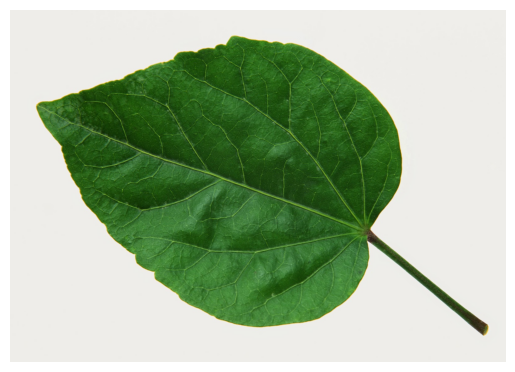

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()

Next, we use the matplotlib library to visualize the image.

In [ ]:
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Subsequently, we load the `AutoImageProcessor` and `ResNetForImageClassification` model. `ResNet-50` is a convolutional neural network that is 50 layers deep and widely used model for image classification tasks.

In [ ]:
inputs = processor(image, return_tensors="pt")

We then process the image using the same processor and transform it into tensors so the model can understand it.

In [ ]:
with torch.no_grad():
    logits = model(**inputs).logits

Let's feed the processed image to the model! The model returns logits, which can be seen as raw predictions from the model.

In [ ]:
predicted_label = logits.argmax(-1).item()
print(f"The image is classified as: {model.config.id2label[predicted_label]}")

The image is classified as: leafhopper


Finally, we identify the most probable label from the logits and print it out. The model config has kindly provided us with a dictionary (`id2label`) to map predicted label IDs back to their human-readable labels.

And voila! You've just used a transformer to identify the content of an image. From NLP to computer vision, transformers are transformative tools for machine learning tasks!

## Exercise Model Hub

In [ ]:
!pip install rggrader

In [ ]:
# @title #### Student Identity
student_id = "your student id" # @param {type:"string"}
name = "your name" # @param {type:"string"}

In [ ]:
# @title #### 00. Autoregressive Models
from rggrader import submit
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# TODO:
# You have the following sentence: "Hello, I'm Ruangguru student,"
# Use an autoregressive model to complete the sentence.
# You can use a library like GPT-2 from Hugging Face to do this.

# Put your code here:
text = none


# ---- End of your code ----

# Submit Method
assignment_id = "00_model_hub"
question_id = "00_autoregressive_models"
submit(student_id, name, assignment_id, text, question_id)

# Example of Expected Output: Hello, I'm Ruangguru student, and this is my first year of the Academy. I want to become a teacher

In [ ]:
# @title #### 01. Autoencoding Models
from rggrader import submit
from transformers import BertTokenizer, BertForMaskedLM
import torch

# TODO:
# Given the following sentence: "I went to the ___ on the weekend."
# Use an autoencoding model like BERT to predict missing words.
# You can use a library like transformers from Hugging Face to do this.

# Put your code here:
predicted_word = none


# ---- End of your code ----

# Submit Method
assignment_id = "00_model_hub"
question_id = "01_autoencoding_models"
submit(student_id, name, assignment_id, predicted_word, question_id)

# Example of Expected Output: movies

In [ ]:
# @title #### 02. Multimodal Models
from rggrader import submit
import torch
from PIL import Image
import requests
from io import BytesIO
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor
from transformers import CLIPProcessor, CLIPModel

# TODO:
# You are given an image URL and a text description: "A small dog is sitting on the sofa."
# Use OpenAI's CLIP multimodal model to generate similarity scores between images and text.
# You can use the transformers library from Hugging Face to do this.

# Note: The similarity score measures how well the image and text match each other according to the model.
# Higher scores indicate greater similarity.

# Put your code here:
image_url = "https://images.unsplash.com/photo-1546447147-3fc2b8181a74?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8ZG9nJTIwc2l0dGluZyUyMG9uJTIwdGhlJTIwc29mYXxlbnwwfHwwfHx8MA%3D%3D&auto=format&fit=crop&w=500&q=60"
similarity_score = none

# ---- End of your code ----

# Submit Method
assignment_id = "00_model_hub"
question_id = "02_multimodal_models"
submit(student_id, name, assignment_id, similarity_score, question_id)

# Example of Expected Output: 1.0